In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("pokemon.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
pd.isnull(df).sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [5]:
df.shape

(801, 41)

In [6]:
height = df['height_m'].mean()
print(height)

1.1638924455825865


In [7]:
df['height_m'].fillna(1.1, inplace=True)


In [8]:
per_mal = df['percentage_male'].mean()
print(per_mal)

55.15576102418208


In [9]:
df['percentage_male'].fillna(55.1, inplace=True)


In [10]:
df['type2'].fillna('NAN', inplace=True)


In [11]:
weight = df['weight_kg'].mean()
print(weight)



61.378104993597944


In [12]:
df['weight_kg'].fillna(61.3, inplace=True)

In [13]:
duplicate_rows = df.duplicated().sum()
total_rows = len(df)

# Calculate the percentage of duplicate rows
duplicate_percentage = (duplicate_rows / total_rows) * 100
print(f"Duplicate Rows: {duplicate_rows}")
print(f"Percentage of Duplicate Rows: {duplicate_percentage:.2f}%")

Duplicate Rows: 0
Percentage of Duplicate Rows: 0.00%


In [14]:
pd.isnull(df).sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

In [15]:
atk = df['attack'].mean()
print(atk)

77.85767790262172


In [16]:
avg = df['attack'].median()
print(avg)

75.0


In [17]:
defe = df['defense'].mean()
print(defe)

73.00873907615481


In [18]:
dm = df['defense'].median()
print(dm)

70.0


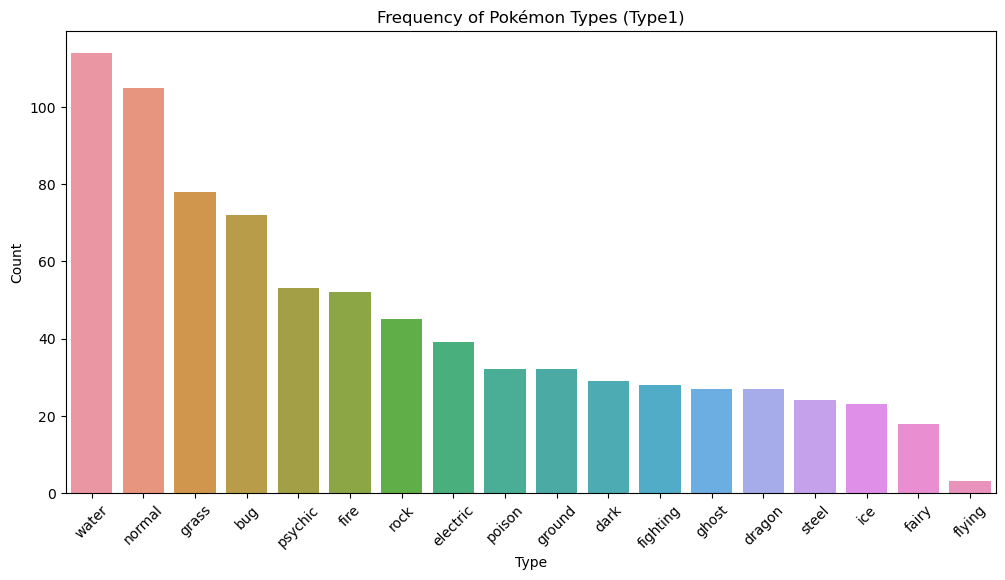

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
type_counts = df['type1'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Frequency of Pokémon Types (Type1)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

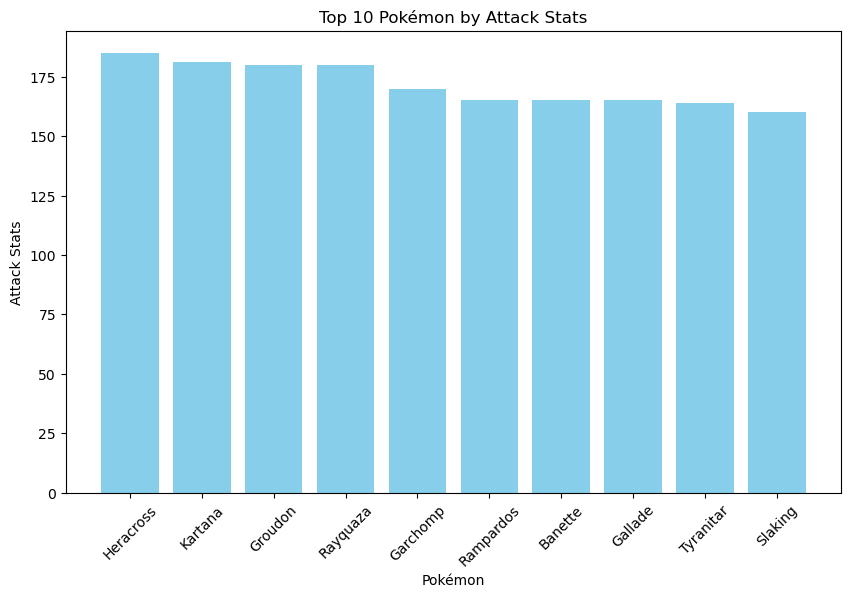

In [20]:
sorted_pokemon = df.sort_values(by='attack', ascending=False)
top_10_attack = sorted_pokemon.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_attack['name'], top_10_attack['attack'], color='skyblue')
plt.xlabel('Pokémon')
plt.ylabel('Attack Stats')
plt.title('Top 10 Pokémon by Attack Stats')
plt.xticks(rotation=45)
plt.show()

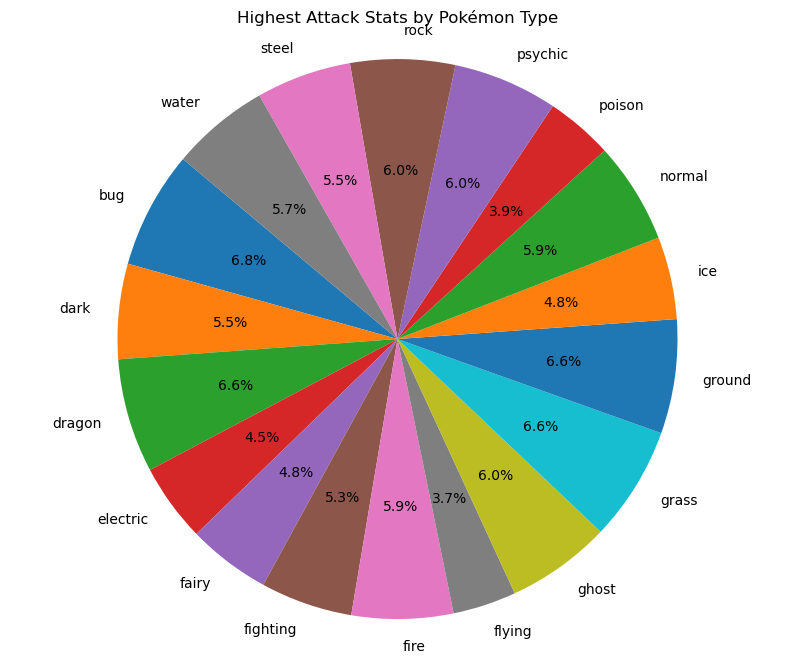

In [21]:
highest_attack_by_type = df.loc[df.groupby('type1')['attack'].idxmax()]
plt.figure(figsize=(10, 8))
plt.pie(highest_attack_by_type['attack'], labels=highest_attack_by_type['type1'], autopct='%1.1f%%', startangle=500)
plt.title('Highest Attack Stats by Pokémon Type')
plt.axis('equal') 
plt.show()

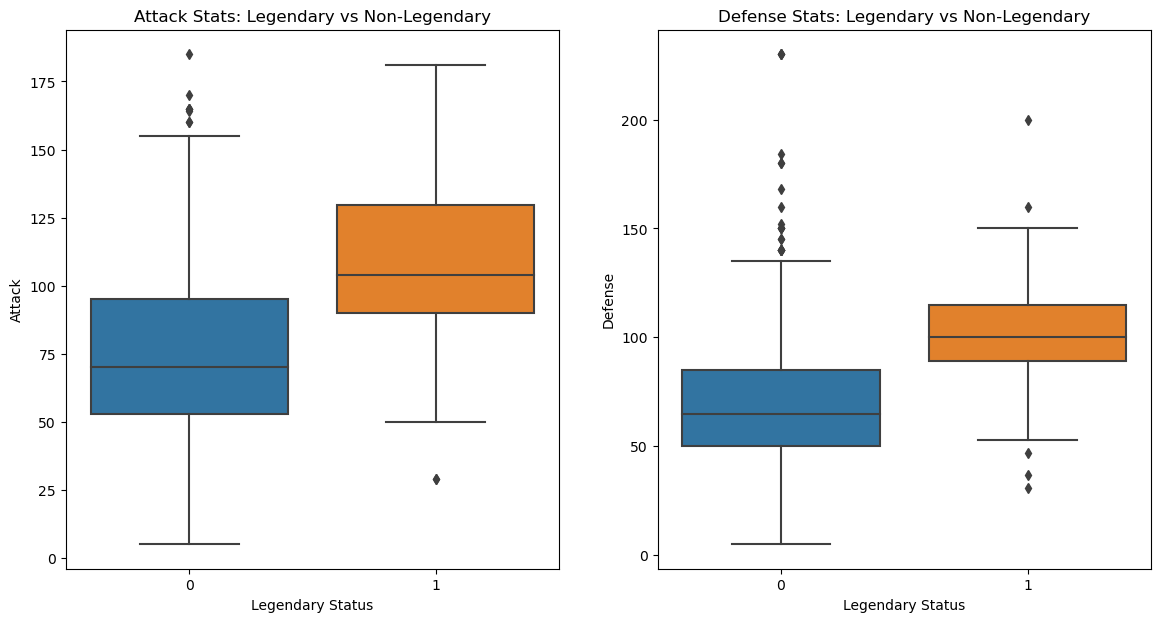

In [22]:
import seaborn as sns
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='is_legendary', y='attack', data=df)
plt.title('Attack Stats: Legendary vs Non-Legendary')
plt.xlabel('Legendary Status')
plt.ylabel('Attack')
plt.subplot(1, 2, 2)
sns.boxplot(x='is_legendary', y='defense', data=df)
plt.title('Defense Stats: Legendary vs Non-Legendary')
plt.xlabel('Legendary Status')
plt.ylabel('Defense')

plt.show()

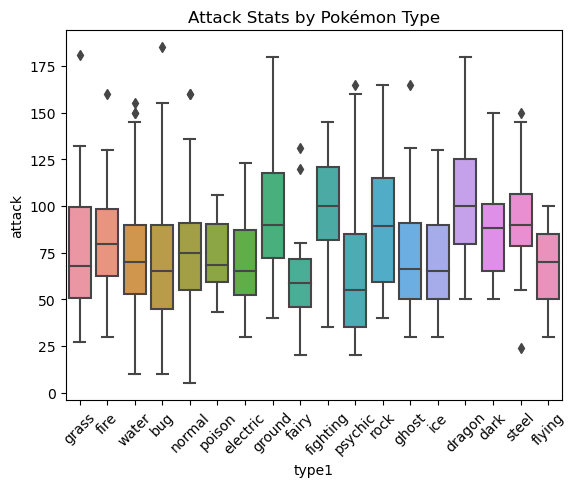

In [23]:
sns.boxplot(x='type1', y='attack', data=df)
plt.title('Attack Stats by Pokémon Type')
plt.xticks(rotation=45)
plt.show()


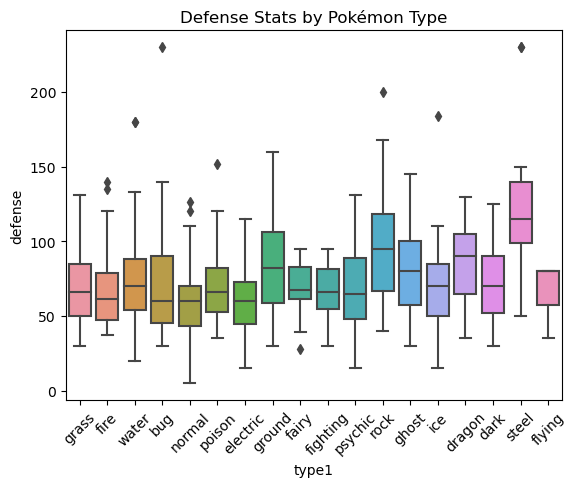

In [24]:
sns.boxplot(x='type1', y='defense', data=df)
plt.title('Defense Stats by Pokémon Type')
plt.xticks(rotation=45)
plt.show()

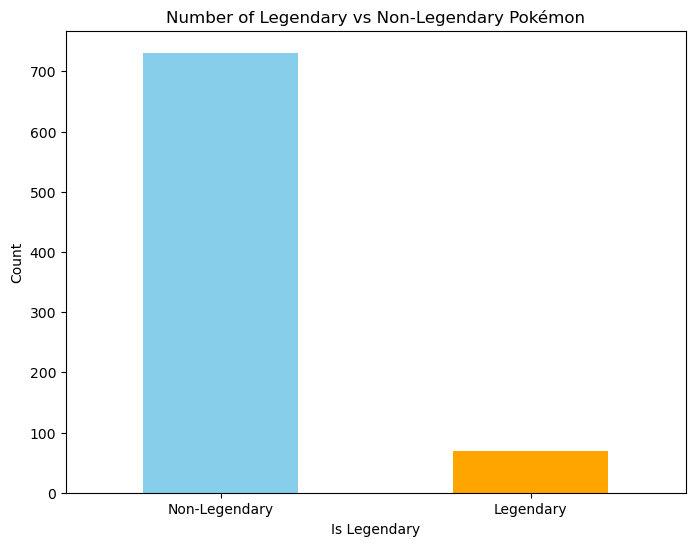

In [25]:
legendary_counts = df['is_legendary'].value_counts()
plt.figure(figsize=(8, 6))
legendary_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Number of Legendary vs Non-Legendary Pokémon')
plt.xlabel('Is Legendary')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Legendary', 'Legendary'], rotation=0)
plt.show()

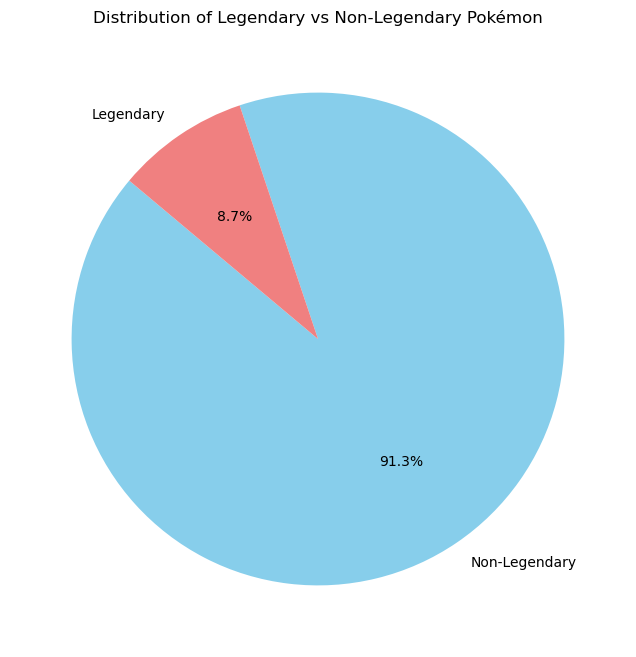

In [26]:
legendary_counts = df['is_legendary'].value_counts().reset_index()
legendary_counts.columns = ['is_legendary', 'count']
legendary_counts['label'] = legendary_counts['is_legendary'].apply(lambda x: 'Legendary' if x == 1 else 'Non-Legendary')
plt.figure(figsize=(8, 8))
plt.pie(legendary_counts['count'], labels=legendary_counts['label'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Legendary vs Non-Legendary Pokémon')
plt.show()


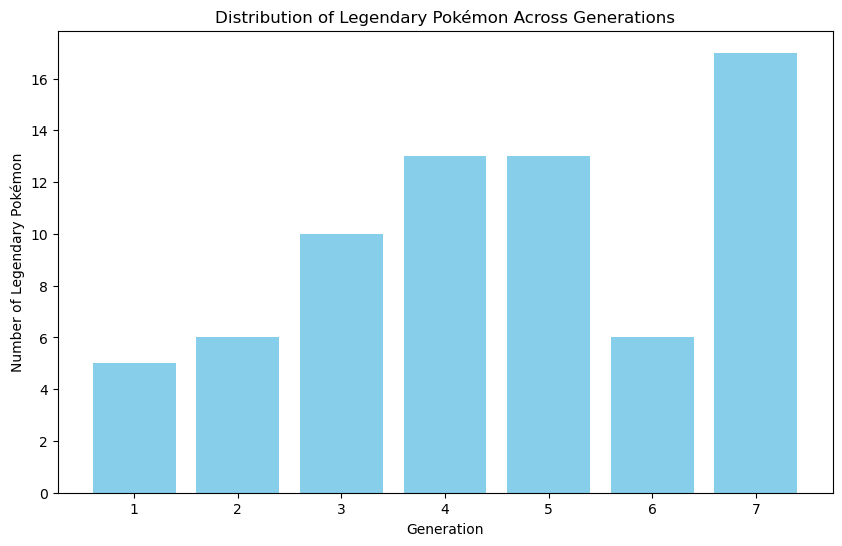

In [27]:
legendary_counts = df.groupby('generation')['is_legendary'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(legendary_counts['generation'], legendary_counts['is_legendary'], color='skyblue')
plt.xlabel('Generation')
plt.ylabel('Number of Legendary Pokémon')
plt.title('Distribution of Legendary Pokémon Across Generations')
plt.xticks(legendary_counts['generation'])
plt.show()

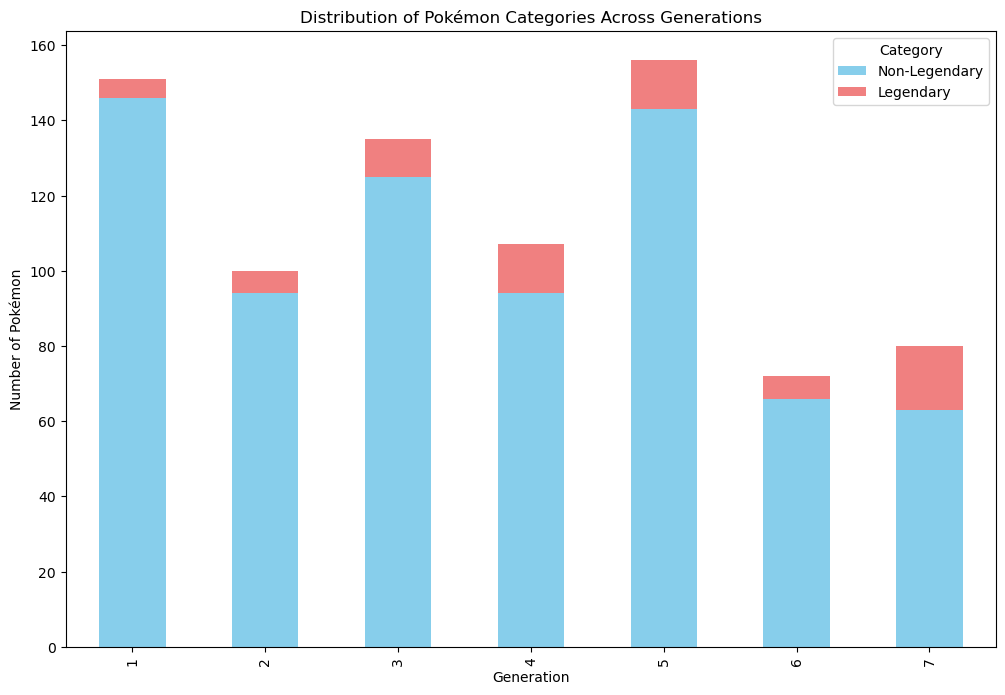

In [28]:
category_counts = df.groupby(['generation', 'is_legendary']).size().unstack(fill_value=0) 
category_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightcoral'])
plt.xlabel('Generation')
plt.ylabel('Number of Pokémon')
plt.title('Distribution of Pokémon Categories Across Generations')
plt.legend(['Non-Legendary', 'Legendary'], title='Category')
plt.show()

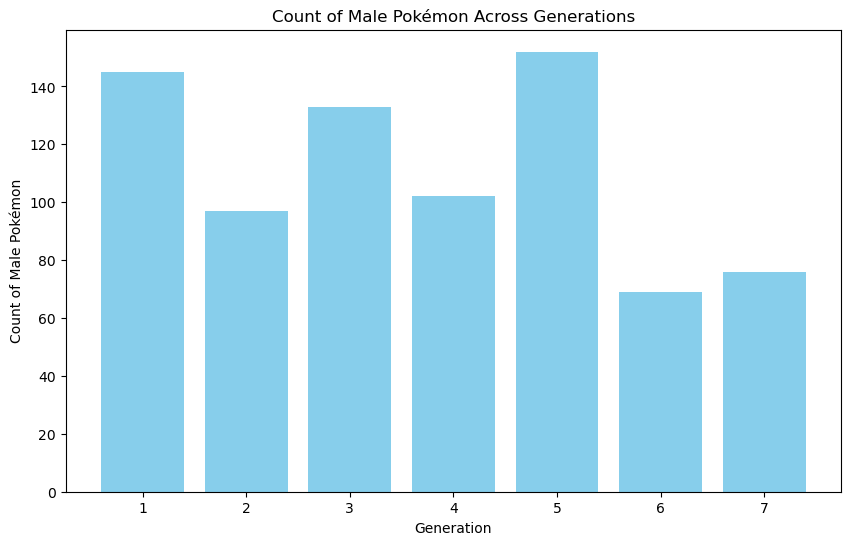

In [29]:
df['is_male'] = df['percentage_male'] > 0
male_counts = df.groupby('generation')['is_male'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(male_counts['generation'], male_counts['is_male'], color='skyblue')
plt.xlabel('Generation')
plt.ylabel('Count of Male Pokémon')
plt.title('Count of Male Pokémon Across Generations')
plt.xticks(male_counts['generation'])
plt.show()

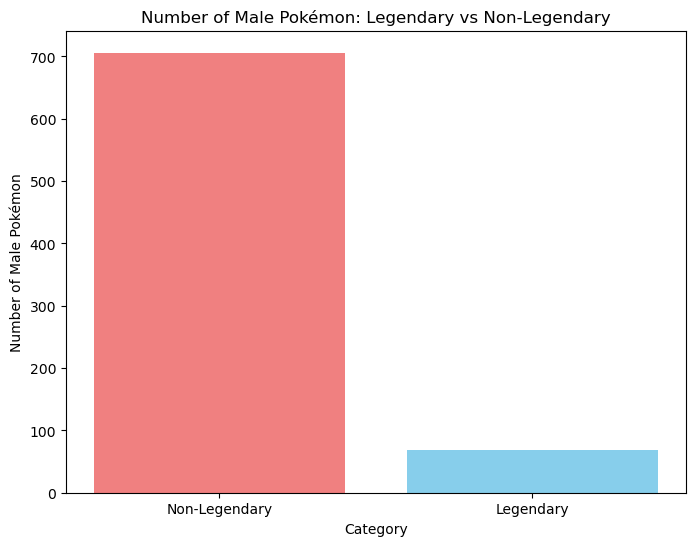

In [30]:
df['is_male'] = df['percentage_male'] > 0
male_counts = df.groupby('is_legendary')['is_male'].sum().reset_index()
male_counts.columns = ['is_legendary', 'male_count']
male_counts['label'] = male_counts['is_legendary'].apply(lambda x: 'Legendary' if x == 1 else 'Non-Legendary')
plt.figure(figsize=(8, 6))
plt.bar(male_counts['label'], male_counts['male_count'], color=['lightcoral', 'skyblue'])
plt.xlabel('Category')
plt.ylabel('Number of Male Pokémon')
plt.title('Number of Male Pokémon: Legendary vs Non-Legendary')
plt.show()

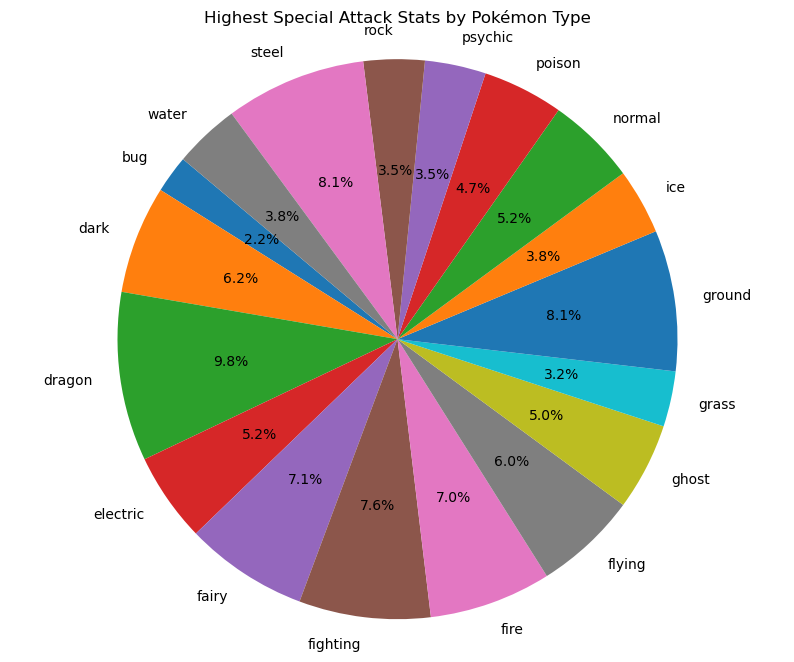

In [31]:
highest_attack_by_type = df.loc[df.groupby('type1')['sp_attack'].idxmax()]
plt.figure(figsize=(10, 8))
plt.pie(highest_attack_by_type['sp_attack'], labels=highest_attack_by_type['type1'], autopct='%1.1f%%', startangle=500)
plt.title('Highest Special Attack Stats by Pokémon Type')
plt.axis('equal') 
plt.show()

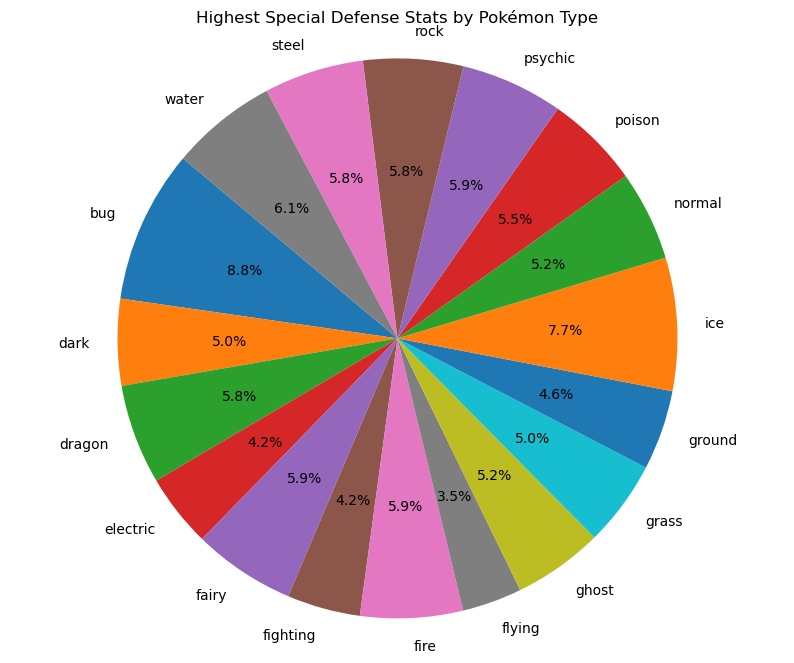

In [39]:
highest_attack_by_type = df.loc[df.groupby('type1')['sp_defense'].idxmax()]
plt.figure(figsize=(10, 8))
plt.pie(highest_attack_by_type['sp_defense'], labels=highest_attack_by_type['type1'], autopct='%1.1f%%', startangle=500)
plt.title('Highest Special Defense Stats by Pokémon Type')
plt.axis('equal') 
plt.show()

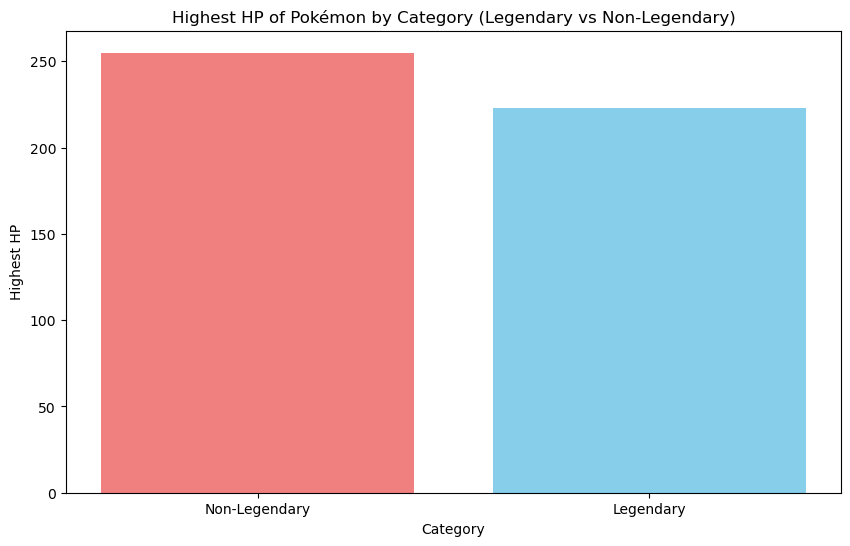

In [33]:
highest_hp = df.groupby('is_legendary')['hp'].max().reset_index()
highest_hp['label'] = highest_hp['is_legendary'].apply(lambda x: 'Legendary' if x == 1 else 'Non-Legendary')
plt.figure(figsize=(10, 6))
plt.bar(highest_hp['label'], highest_hp['hp'], color=['lightcoral', 'skyblue'])
plt.xlabel('Category')
plt.ylabel('Highest HP')
plt.title('Highest HP of Pokémon by Category (Legendary vs Non-Legendary)')
plt.show()

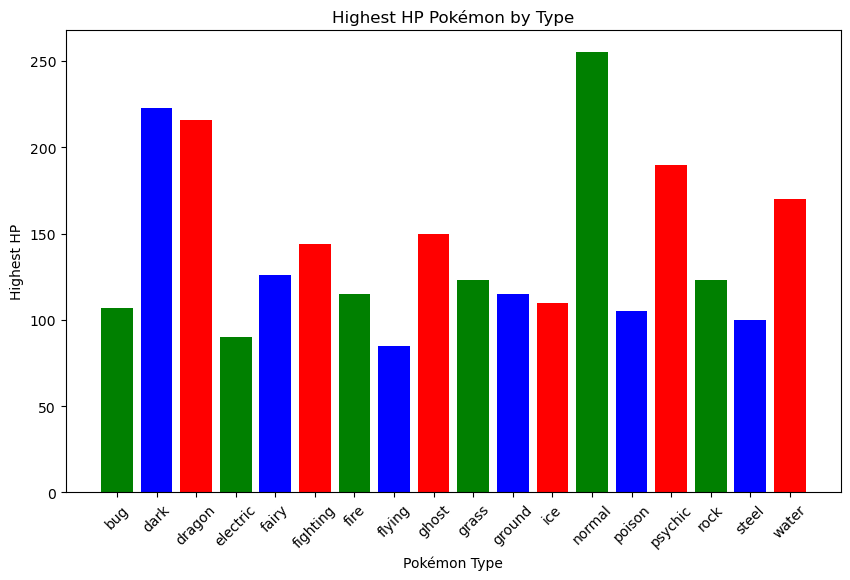

In [34]:
highest_hp_pokemon = df.loc[df.groupby('type1')['hp'].idxmax()]
plt.figure(figsize=(10, 6))
plt.bar(highest_hp_pokemon['type1'], highest_hp_pokemon['hp'], color=['green', 'blue', 'red'])
plt.xlabel('Pokémon Type')
plt.ylabel('Highest HP')
plt.title('Highest HP Pokémon by Type')
plt.xticks(rotation=45)
plt.show()

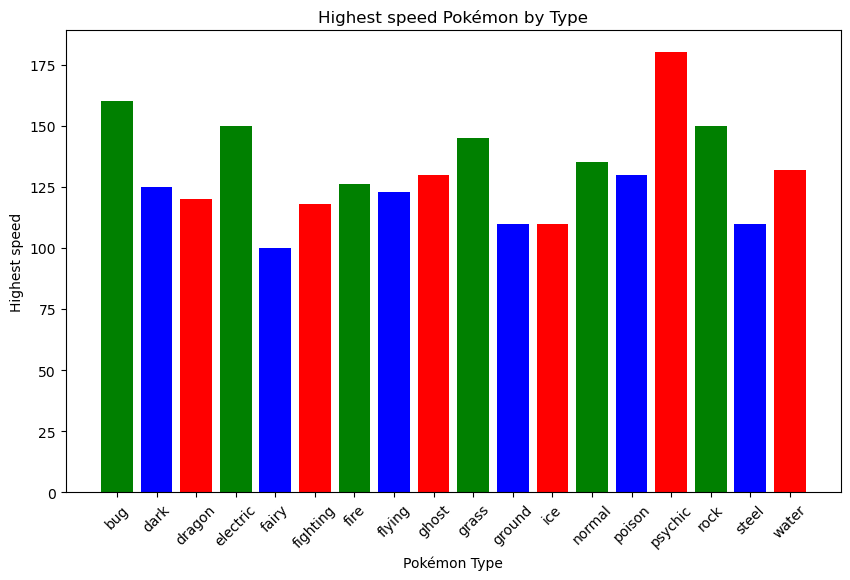

In [35]:
highest_speed_pokemon = df.loc[df.groupby('type1')['speed'].idxmax()]
plt.figure(figsize=(10, 6))
plt.bar(highest_hp_pokemon['type1'], highest_speed_pokemon['speed'], color=['green', 'blue', 'red'])
plt.xlabel('Pokémon Type')
plt.ylabel('Highest speed')
plt.title('Highest speed Pokémon by Type')
plt.xticks(rotation=45)
plt.show()

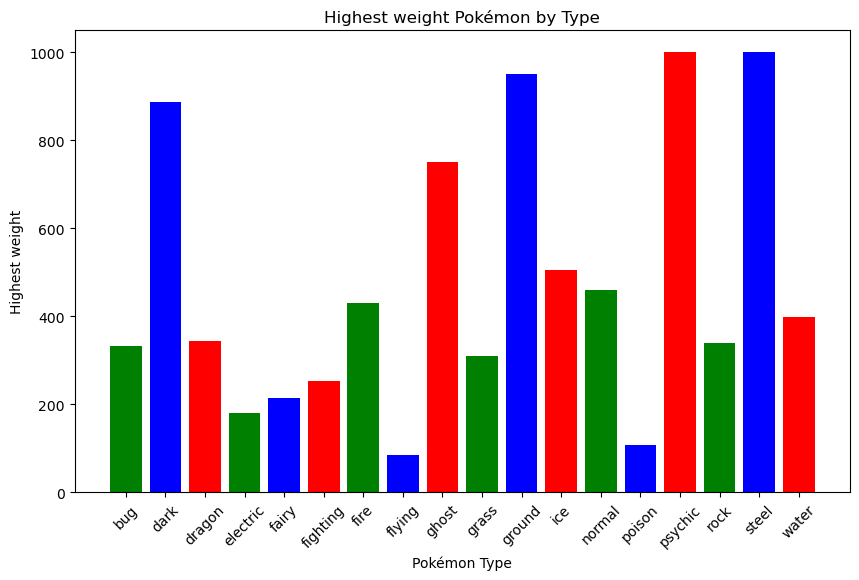

In [36]:
highest_weight_pokemon = df.loc[df.groupby('type1')['weight_kg'].idxmax()]
plt.figure(figsize=(10, 6))
plt.bar(highest_weight_pokemon['type1'], highest_weight_pokemon['weight_kg'], color=['green', 'blue', 'red'])
plt.xlabel('Pokémon Type')
plt.ylabel('Highest weight')
plt.title('Highest weight Pokémon by Type')
plt.xticks(rotation=45)
plt.show()

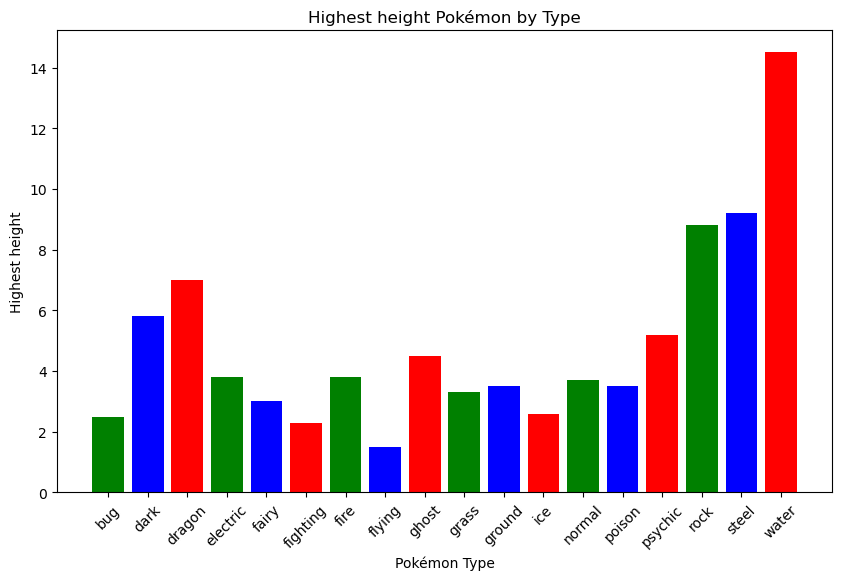

In [37]:
highest_height_pokemon = df.loc[df.groupby('type1')['height_m'].idxmax()]
plt.figure(figsize=(10, 6))
plt.bar(highest_height_pokemon['type1'], highest_height_pokemon['height_m'], color=['green', 'blue', 'red'])
plt.xlabel('Pokémon Type')
plt.ylabel('Highest height')
plt.title('Highest height Pokémon by Type')
plt.xticks(rotation=45)
plt.show()

In [41]:
Q1 = df['defense'].quantile(0.25)
Q3 = df['defense'].quantile(0.75)
IQR = Q3 - Q1
print("IQR (Interquartile Range):", IQR)

IQR (Interquartile Range): 40.0


In [42]:
Q1 = df['attack'].quantile(0.25)
Q3 = df['attack'].quantile(0.75)
IQR = Q3 - Q1
print("IQR (Interquartile Range):", IQR)

IQR (Interquartile Range): 45.0


In [43]:
Q1 = df['sp_attack'].quantile(0.25)
Q3 = df['sp_attack'].quantile(0.75)
IQR = Q3 - Q1
print("IQR (Interquartile Range):", IQR)

IQR (Interquartile Range): 46.0


In [44]:
Q1 = df['sp_defense'].quantile(0.25)
Q3 = df['sp_defense'].quantile(0.75)
IQR = Q3 - Q1
print("IQR (Interquartile Range):", IQR)

IQR (Interquartile Range): 40.0


In [45]:
Q1 = df['hp'].quantile(0.25)
Q3 = df['hp'].quantile(0.75)
IQR = Q3 - Q1
print("IQR (Interquartile Range):", IQR)

IQR (Interquartile Range): 30.0


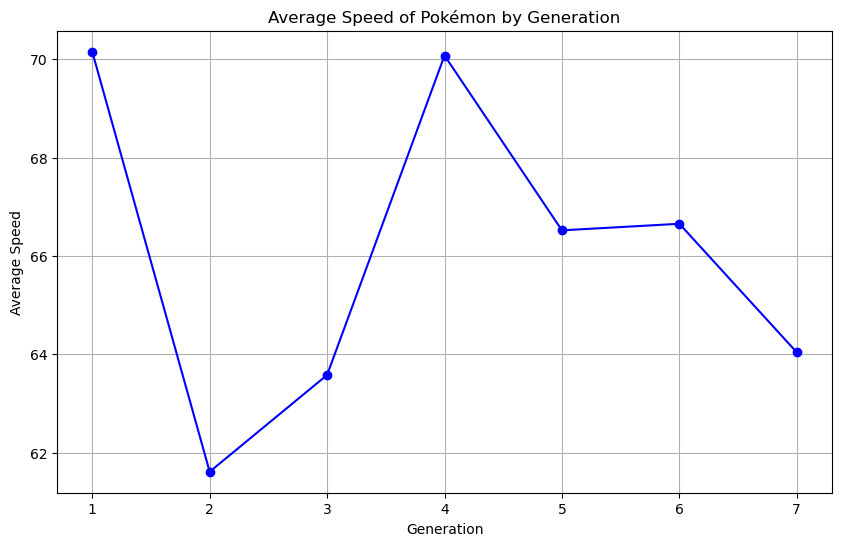

In [46]:
average_speed = df.groupby('generation')['speed'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(average_speed['generation'], average_speed['speed'], marker='o', linestyle='-', color='b')
plt.title('Average Speed of Pokémon by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Speed')
plt.xticks(average_speed['generation'])  
plt.grid(True)
plt.show()